<a href="https://colab.research.google.com/github/AnovaYoung/SchoolProjects/blob/main/ARIMA_MODELING_Ticket_QQQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
!{sys.executable} -m pip install yfinance statsmodels

In [ ]:
import pandas as pd
import numpy as np
import yfinance
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
stock_ticker = 'QQQ'

stock_info = yfinance.Ticker(stock_ticker)
for key,value in stock_info.info.items():
    print(key, ":", value)

longBusinessSummary : To maintain the correspondence between the composition and weights of the securities in the trust (the "securities") and the stocks in the NASDAQ-100 Index®, the adviser adjusts the securities from time to time to conform to periodic changes in the identity and/or relative weights of index securities. The composition and weighting of the securities portion of a portfolio deposit are also adjusted to conform to changes in the index.
maxAge : 86400
priceHint : 2
previousClose : 479.19
open : 479.41
dayLow : 478.14
dayHigh : 486.86
regularMarketPreviousClose : 479.19
regularMarketOpen : 479.41
regularMarketDayLow : 478.14
regularMarketDayHigh : 486.86
trailingPE : 39.553497
volume : 36283915
regularMarketVolume : 36283915
averageVolume : 38148587
averageVolume10days : 26468500
averageDailyVolume10Day : 26468500
bid : 484.24
ask : 485.6
bidSize : 4300
askSize : 4300
yield : 0.0058
totalAssets : 270069170176
fiftyTwoWeekLow : 342.35
fiftyTwoWeekHigh : 486.86
fiftyDayAv

In [ ]:
# Get 10 years of historic weekly price data for QQQ ticker

start_date = '2014-03-10'
end_date = '2024-03-10'

stock_info_price = stock_info.history(start=start_date, end=end_date, interval='1wk')
stock_info_price.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2014-03-10 00:00:00-04:00,83.195004,83.728300,81.493951,81.530731,160867500,0.000,0.0,0.0
2014-03-17 00:00:00-04:00,82.054834,83.360508,81.677849,81.834160,194975300,0.206,0.0,0.0
2014-03-24 00:00:00-04:00,82.316190,82.380701,79.625157,80.224190,265068600,0.000,0.0,0.0
2014-03-31 00:00:00-04:00,80.850871,82.647964,79.385543,79.597511,268772000,0.000,0.0,0.0
2014-04-07 00:00:00-04:00,79.099856,80.989106,77.330410,77.514725,348493700,0.000,0.0,0.0


                                Open       High        Low      Close  \
Date                                                                    
2014-03-10 00:00:00-04:00  83.195004  83.728300  81.493951  81.530731   
2014-03-17 00:00:00-04:00  82.054834  83.360508  81.677849  81.834160   
2014-03-24 00:00:00-04:00  82.316190  82.380701  79.625157  80.224190   
2014-03-31 00:00:00-04:00  80.850871  82.647964  79.385543  79.597511   
2014-04-07 00:00:00-04:00  79.099856  80.989106  77.330410  77.514725   

                              Volume  Dividends  Stock Splits  Capital Gains  \
Date                                                                           
2014-03-10 00:00:00-04:00  160867500      0.000           0.0            0.0   
2014-03-17 00:00:00-04:00  194975300      0.206           0.0            0.0   
2014-03-24 00:00:00-04:00  265068600      0.000           0.0            0.0   
2014-03-31 00:00:00-04:00  268772000      0.000           0.0            0.0   
2014-04-

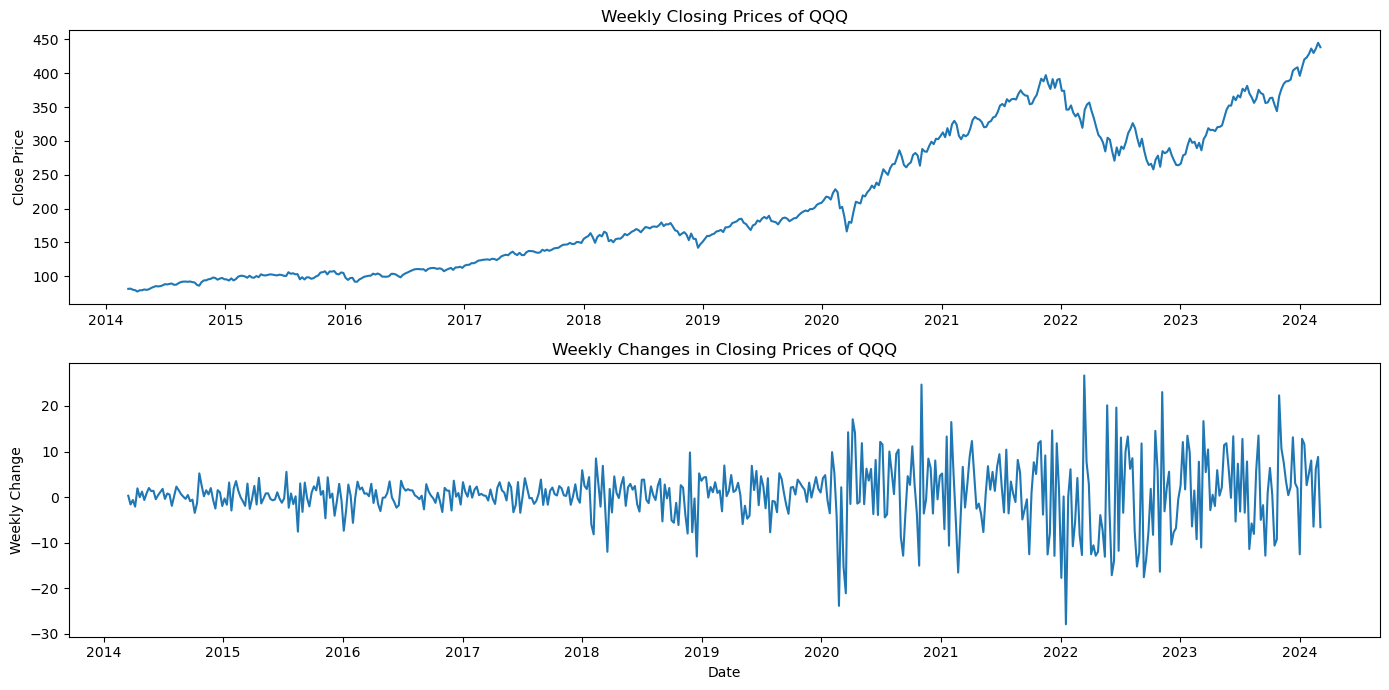

In [ ]:
# pulling out the closing price
closing_prices = stock_info_price['Close']

# Calculate the weekly changes in close prices
weekly_changes = closing_prices.diff().dropna()

# Add that weekly changes as a new column to the dataframe
stock_info_price['Weekly Change'] = closing_prices.diff()

# new df
print(stock_info_price.head())

# Visualization
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(stock_info_price['Close'])
plt.title('Weekly Closing Prices of QQQ')
plt.ylabel('Close Price')

plt.subplot(2, 1, 2)
plt.plot(stock_info_price['Weekly Change'])
plt.title('Weekly Changes in Closing Prices of QQQ')
plt.ylabel('Weekly Change')
plt.xlabel('Date')

plt.tight_layout()
plt.show()


In [ ]:
# Dickey-Fuller test on closing prices
dftest = adfuller(closing_prices.dropna(), autolag='AIC')

# Test results
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value

print(dfoutput)


Test Statistic                   0.487627
p-value                          0.984492
#Lags Used                       0.000000
Number of Observations Used    521.000000
Critical Value (1%)             -3.442964
Critical Value (5%)             -2.867103
Critical Value (10%)            -2.569733
dtype: float64


 The results of the Dickey-Fuller test indicate that the time series of weekly closing prices for QQQ is non-stationary. The test statistic (0.487626) is higher than the critical values at 1%, 5%, and 10% significance levels (-3.442964, -2.867103, and -2.569733, respectively). Additionally, the p-value (0.984492) is significantly higher than the common significance level of 0.05 this in turn says we fail to reject the null hypothesis that the series has a unit root. This suggests that the time series does not have constant statistical properties over time and exhibits non-stationarity.

Next, I will decompose the time series to evaluate its trend, seasonality, and residuals. This will help us understand the underlying patterns in the data.

Let's use the seasonal decomposition of time series (STL) to break down the series into these components

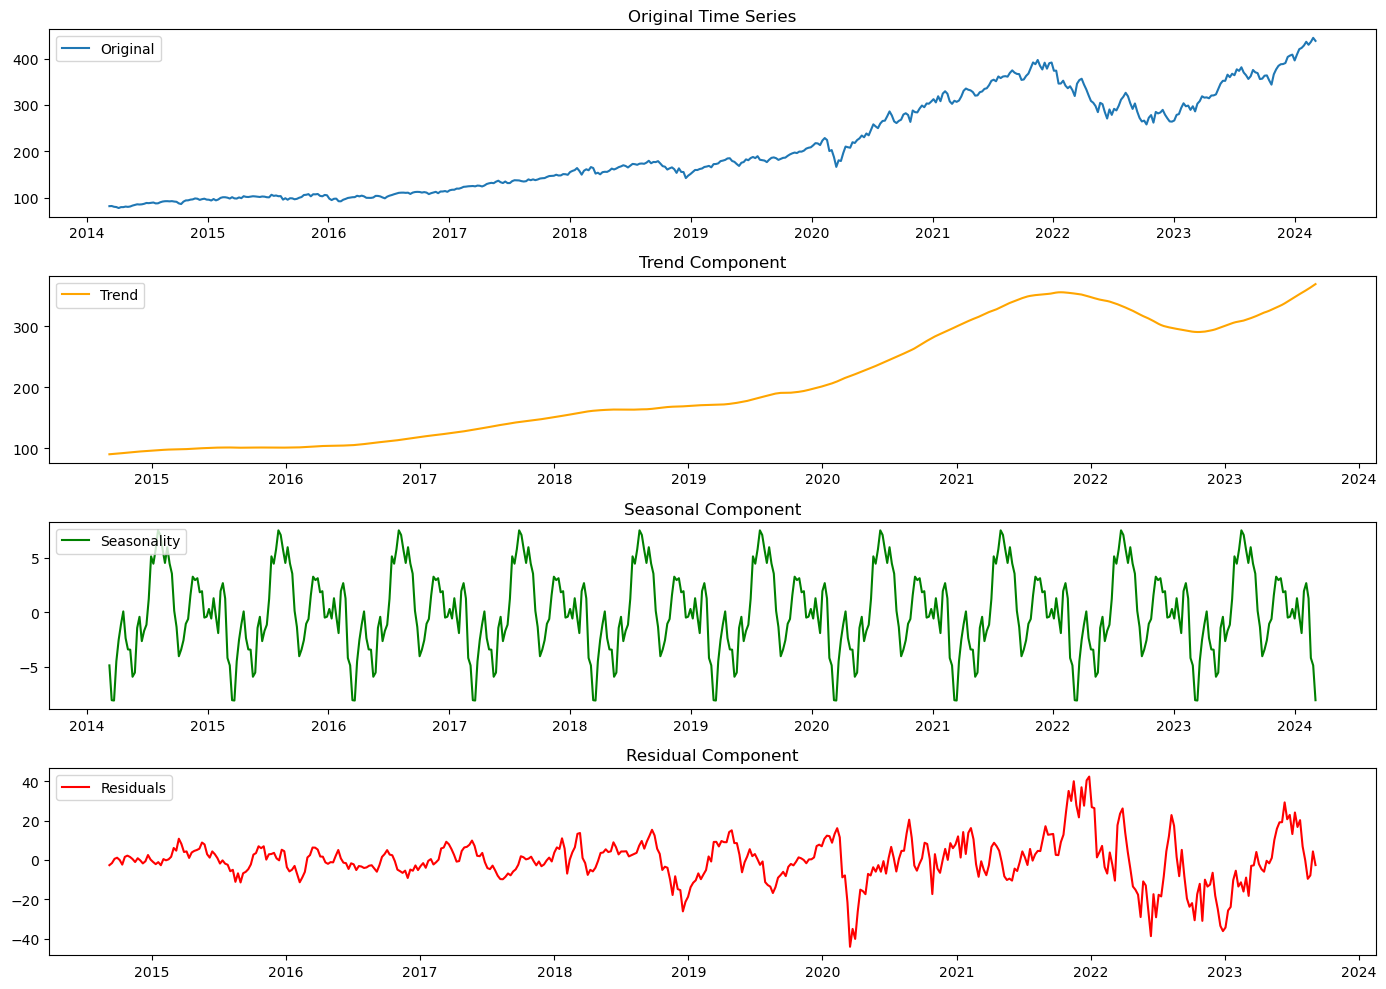

In [ ]:
# Decompose the time series using seasonal decomposition
decomposition = seasonal_decompose(closing_prices.dropna(), model='additive', period=52)  # Using a period of 52 for weekly data

# pull out the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(closing_prices, label='Original')
plt.title('Original Time Series')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Original Time Series: This shows the raw data of weekly closing prices.

Trend Component: This depicts the long-term progression of the series. We see a general upward trend over the 10-year period.

Seasonal Component: This highlights the repeating short-term cycles in the data. We observe regular patterns indicating seasonality.

Residual Component: This represents the remaining variability in the data after removing the trend and seasonal components. It shows the irregular or random noise in the series.

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  509
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1670.999
Date:                Mon, 17 Jun 2024   AIC                           3353.998
Time:                        14:39:04   BIC                           3379.381
Sample:                    03-10-2014   HQIC                          3363.951
                         - 12-04-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0335      0.031     -1.076      0.282      -0.095       0.028
ar.L2          0.0506      0.031      1.633      0.102      -0.010       0.111
ar.L3          0.0426      0.029      1.450      0.1

/Users/anovayoungers/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/anovayoungers/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/anovayoungers/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


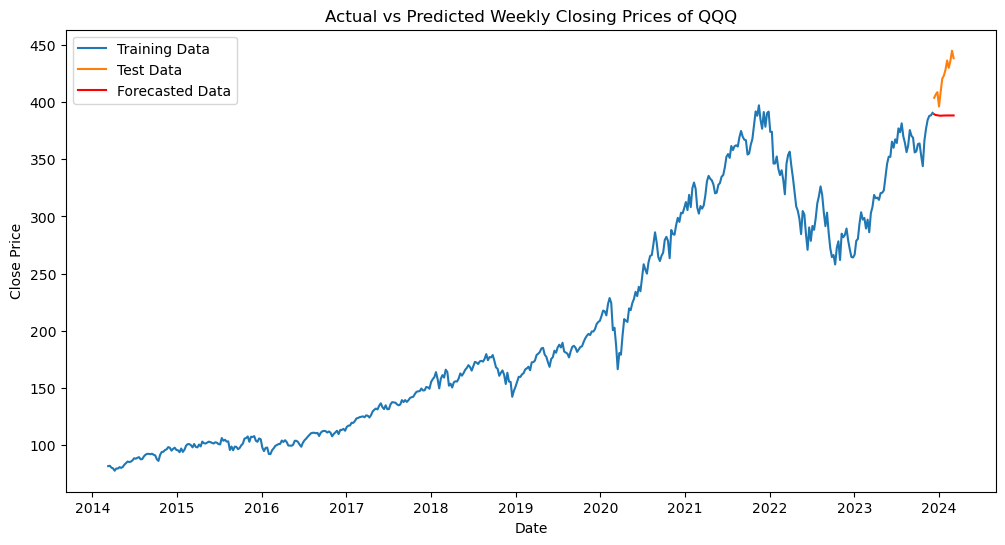

In [ ]:
# Split the data into training and test sets
train = closing_prices[:-13]
test = closing_prices[-13:]

# Build the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Using order (5, 1, 0) as a starting point
model_fit = model.fit()


print(model_fit.summary())

forecast = model_fit.forecast(steps=13)
forecast_index = test.index

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast, label='Forecasted Data', color='red')
plt.title('Actual vs Predicted Weekly Closing Prices of QQQ')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


The coefficients for the AR terms are mostly not significant except for ar.L5.

The Ljung-Box Q test has a p-value of 0.85, I take this to mean there are no significant autocorrelation in the residuals at lag 1.

The Jarque-Bera test has a super low p-value which typically indicates non-normality of residuals.

The model has an AIC of 3353.999, which can be used for model comparison with other ARIMA models in a normal testing enviroment I would proceed with parameter fine tuning.


The ARIMA model predictions (red line) for the test data (orange line) do not align well with the actual values. The model needs further tuning or a different approach to improve its forecasting accuracy.

**Predict the most recent 13 data points and compare these predictions to the actual values.**



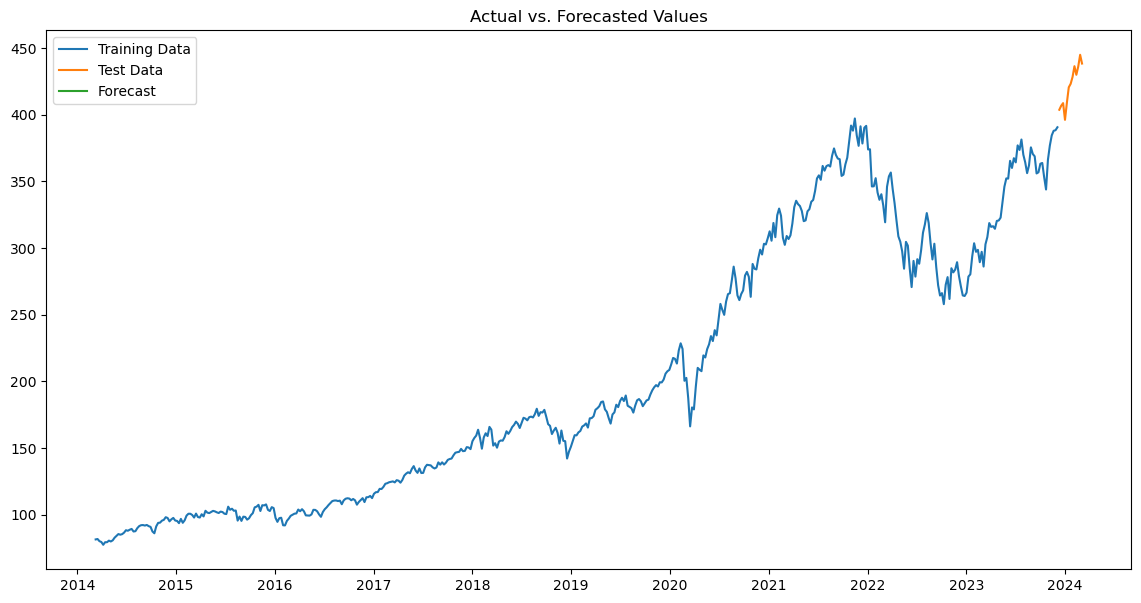

                               Actual    Forecast
2023-12-11 00:00:00-05:00  403.785400  389.440986
2023-12-18 00:00:00-05:00  406.813751  388.780231
2023-12-25 00:00:00-05:00  408.764191  388.521434
2024-01-01 00:00:00-05:00  396.226074  388.283725
2024-01-08 00:00:00-05:00  409.019165  388.133296
2024-01-15 00:00:00-05:00  420.623810  388.255011
2024-01-22 00:00:00-05:00  423.250336  388.303075
2024-01-29 00:00:00-05:00  428.443481  388.336255
2024-02-05 00:00:00-05:00  436.472839  388.371123
2024-02-12 00:00:00-05:00  430.001434  388.379435
2024-02-19 00:00:00-05:00  436.203217  388.369439
2024-02-26 00:00:00-05:00  445.021545  388.365790
2024-03-04 00:00:00-05:00  438.440247  388.361021


In [ ]:
# Forecast the next 13 points
forecast = model_fit.forecast(steps=13)
forecast_index = test.index

# Create df for forecast
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Actual vs. predicted data Vis for the full dataset including the forecast
plt.figure(figsize=(14, 7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast_df, label='Forecast')
plt.legend(loc='upper left')
plt.title('Actual vs. Forecasted Values')
plt.show()

# Compare forecasted to actual values
comparison_df = pd.DataFrame({'Actual': test, 'Forecast': forecast})
print(comparison_df)


The actual closing prices generally show an increasing trend.

The forecasted values, however, remain relatively flat around the value of approximately 388.4.

I would conclude that the ARIMA(5,1,0) model did not capture the upward trend present in the actual data for these 13 weeks. The model predicted a stable level of closing prices directly contradicting the observed increase.

There are several reasons why this is happening:

1. The chosen order of the ARIMA model (5,1,0) is likely not optimal for capturing the dynamics of the QQQ stock prices.

2. The data shows a strong trend with potential seasonality which the ARIMA model might not have adequately captured.

3. Stock prices are influenced by an innumerable amount of external factors (e.g., wars, news, market sentiment) that a basic ARIMA model cannot account for.

This is generally what makes stock market forecasting so difficult.